In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv("data_new.csv")

# divide data by dependent and features (predictor) variables
X_features = dataset.iloc[:,4:15].values
y_dependent = dataset.iloc[:, -1].values


#show the first 5 samples
dataset.head(5)

,OID_,X,Y,Hurst,TWI,TPI300,TPI50,SPI,Slope,NS,DD,EW,Elv,Rain,DRS,Hurtz
0,39,93965.4461,3295461.117,0.658765,5.938030,2.100799,1.687004,0.000000,4.363049,-0.140835,0.317881,-0.990033,8,1484.559937,2499.802979,0
1,40,94387.2472,3295445.781,0.571676,8.177277,6.086994,4.996416,4.703273,2.327391,-0.393406,0.317414,-0.919365,12,1484.559937,2364.912109,0
2,44,96074.4400,3295384.595,0.599995,7.776092,4.100328,2.452830,4.214868,2.780289,0.974567,0.308773,-0.224095,10,1484.559937,2527.440674,0
3,46,96918.0291,3295354.098,0.645856,6.104195,6.105993,5.745223,0.000000,3.697116,-0.121272,0.290225,0.992619,12,1484.559937,2054.093018,0
4,74,89367.3706,3296767.165,0.585960,7.707360,0.507525,0.245173,4.514750,2.977758,-0.910175,0.193625,-0.414224,7,1445.563355,2831.239014,0


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_features, y_dependent, test_size = 0.25, random_state = 0)
print(X_train)

[[ 1.35307617e+01 -1.21683540e+01 -1.40186119e+01 ...  3.40000000e+01
   1.59625952e+03  1.71962439e+03]
 [ 6.79526230e+00 -4.32851030e+00  7.94265700e-01 ...  4.20000000e+01
   1.66200061e+03  5.78617783e+01]
 [ 8.53248310e+00 -1.27477493e+01  9.04396100e-01 ...  7.70000000e+01
   1.50586389e+03  1.59119885e+03]
 ...
 [ 1.52237787e+01 -2.88240509e+01 -1.69965515e+01 ...  1.48000000e+02
   1.52759094e+03  6.46914368e+01]
 [ 8.84725570e+00 -3.35129623e+01 -8.37998960e+00 ...  6.50000000e+01
   1.52397742e+03  1.04311806e+02]
 [ 5.89505290e+00  5.37789920e+00  1.22637329e+01 ...  3.07000000e+02
   1.76245972e+03  7.31900024e+02]]


In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_validate = sc.transform(X_validate)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier

# define a stacking esemble model
def stacked_esemble():
    
    #collate the models to evaluate
    model_to_stack = list()
    model_to_stack.append(('NB', GaussianNB()))
    model_to_stack.append(('KS', SVC(kernel = 'rbf')))
    model_to_stack.append(('RF', RandomForestClassifier(n_estimators = 10, criterion = 'entropy')))
    model_to_stack.append(('KN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
    model_to_stack.append(('CT', DecisionTreeClassifier(criterion = 'entropy')))
    
    # define the most basic model that will learn the best way to combine all other models
    basic_model = GaussianNB()
    
    #create the the esemble model by stacking them
    esemble_model = StackingClassifier(model_to_stack, basic_model, cv = 5)
    return esemble_model

In [6]:
# define the list of models for predcition

def list_classifiers():
    classifiers = dict()
    classifiers['NB'] = GaussianNB()
    classifiers['KS'] = SVC(kernel = 'rbf')
    classifiers['RF'] = RandomForestClassifier(n_estimators = 10, criterion = 'entropy')
    classifiers['KN'] = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifiers['CT'] = DecisionTreeClassifier(criterion = 'entropy')
    
    # define the stcking esemble models
    classifiers['EM'] = stacked_esemble()
    return classifiers

In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
# cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)
# accuracies = cross_val_score(classifier, X_train, y_train, cv = cv)
# print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
# print('standard deviation: {:.2f} %'.format(accuracies.std()*100))


def cross_evaluation(classifiers, X_train, y_train):
    accuracies = cross_val_score(classifier, X_train, y_train, cv = 5)
    return accuracies

In [8]:
from numpy import mean, std
# retrieve the models itn an object
classifiers = list_classifiers()

#create an empy lsit where all the results will be imported into
output, classifier_names = list(), list()

# cross evalute the models with kfold cross validation
for classifier_name, classifier in classifiers.items():
    accuracies = cross_evaluation(classifier, X_train, y_train)
    output.append(accuracies)
    classifier_names.append(classifier_name)
    print('>%s %.3f (%.3f)' % (classifier_name, mean(accuracies), std(accuracies)))

>NB 0.814 (0.106)
>KS 0.907 (0.000)
>RF 0.905 (0.001)
>KN 0.899 (0.001)
>CT 0.836 (0.002)
>EM 0.884 (0.005)


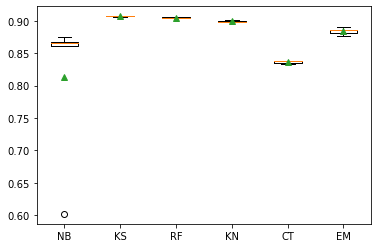

In [11]:
from matplotlib import pyplot
pyplot.boxplot(output, labels = classifier_names, showmeans = True)
pyplot.show()